# Importing Libraries

In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.metrics import accuracy_score, confusion_matrix

warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

In [176]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')

In [177]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [178]:
test_df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [179]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [180]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [181]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [182]:
#Checking duplicates
print("Duplicates in Training Data")
print((train_df.duplicated().sum()),round(train_df.duplicated().sum()/len(train_df)*100,2))
print("Duplicates in Test Data")
print((test_df.duplicated().sum()),round(test_df.duplicated().sum()/len(train_df)*100,2))

Duplicates in Training Data
0 0.0
Duplicates in Test Data
0 0.0


In [183]:
#Checking Dtypes
print("Checking Dtypes in Training Data")
print("\n")
print(train_df.dtypes)
print("\n")
print("-"*40)
print("Checking Dtypes in Test Data")
print(test_df.dtypes)

Checking Dtypes in Training Data


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


----------------------------------------
Checking Dtypes in Test Data
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [184]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [185]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


# EDA

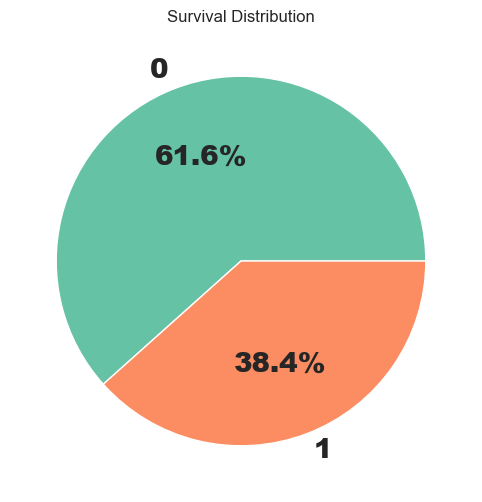

In [186]:
plt.figure(figsize = (12,6))
plt.pie(train_df["Survived"].value_counts(),labels = train_df["Survived"].value_counts().keys(),autopct="%1.1f%%",textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set2"))
plt.title("Survival Distribution")
plt.show()

Only 38% of people survived

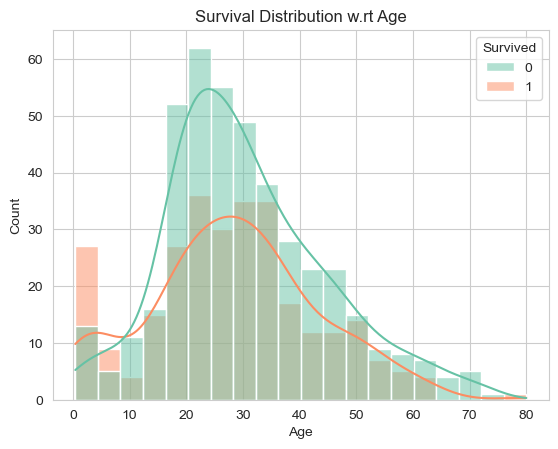

In [187]:
sns.histplot(x="Age",data=train_df,kde=True,hue="Survived",palette="Set2",bins=20)
plt.title("Survival Distribution w.rt Age")
plt.show()

* Distribution is Normal
* Most of the people survived within 10 years of age
* Minimum age is 0 amd Max age is 80


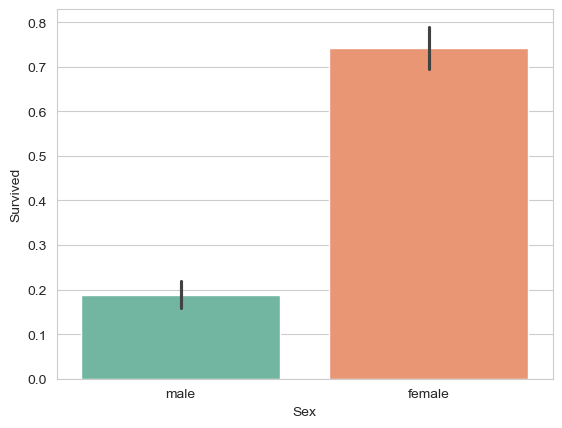

The percentage of values 
Survival Ratio of Males: 18.890814558058924
Survival Ratio of Females 74.20382165605095


In [188]:
sns.barplot(x='Sex',y='Survived',data=train_df,palette="Set2")
plt.show()
print("The percentage of values ")
print("Survival Ratio of Males:",train_df["Survived"][train_df["Sex"]=="male"].value_counts(normalize=True)[1]*100)
print("Survival Ratio of Females",train_df["Survived"][train_df["Sex"]=="female"].value_counts(normalize=True)[1]*100)

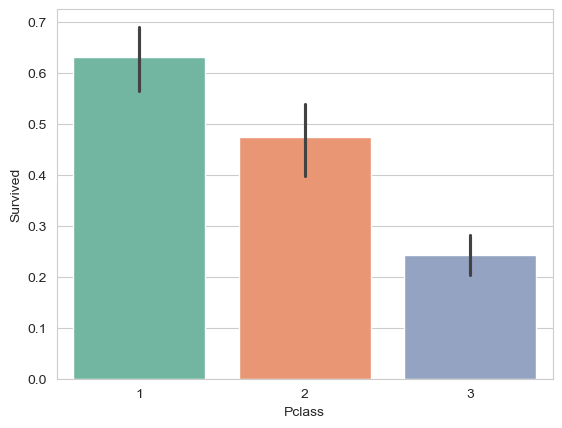

Survival Rate of Class1 62.96
Survival Rate of Class2 47.28
Survival Rate of Class3 24.24


In [189]:
sns.barplot(x='Pclass',y='Survived',data=train_df,palette="Set2")
plt.show()
print("Survival Rate of Class1",round(train_df["Survived"][train_df["Pclass"]==1].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of Class2",round(train_df["Survived"][train_df["Pclass"]==2].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of Class3",round(train_df["Survived"][train_df["Pclass"]==3].value_counts(normalize=True)[1]*100,2))

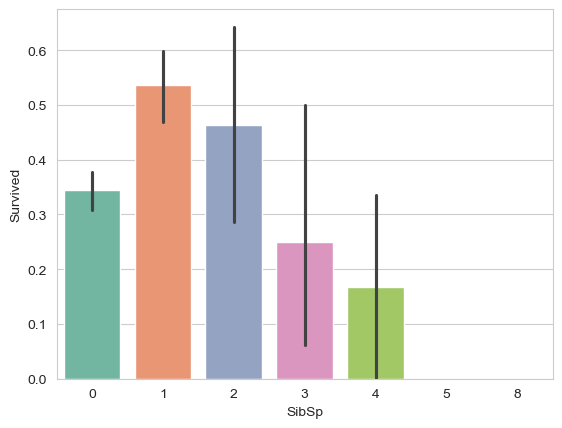

Survival Rate of 0 Siblings 34.54
Survival Rate of 1 Siblings 53.59
Survival Rate of 2 Siblings 46.43
Survival Rate of 3 Siblings 25.0
Survival Rate of 4 Siblings 16.67


In [190]:
sns.barplot(x='SibSp',y='Survived',data=train_df,palette="Set2")
plt.show()
print("Survival Rate of 0 Siblings",round(train_df["Survived"][train_df["SibSp"]==0].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of 1 Siblings",round(train_df["Survived"][train_df["SibSp"]==1].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of 2 Siblings",round(train_df["Survived"][train_df["SibSp"]==2].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of 3 Siblings",round(train_df["Survived"][train_df["SibSp"]==3].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of 4 Siblings",round(train_df["Survived"][train_df["SibSp"]==4].value_counts(normalize=True)[1]*100,2))



* The survival rate of a couple or a couple with a single parent/child has highest survival rate.
* The survival rate of a single identity comes next.
* The survival rate with more more family members is low.

In [191]:
train_df["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

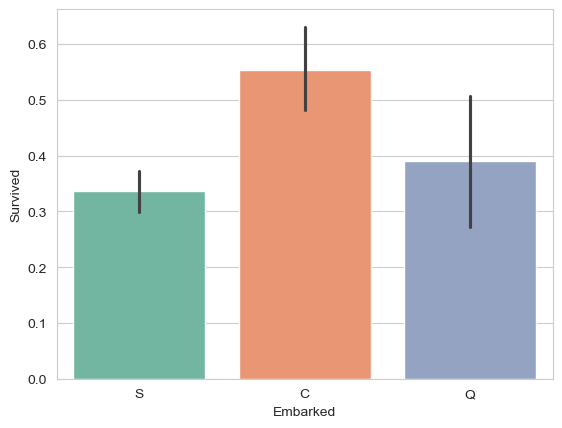

Survival Rate of passengers embarked from Cherbourg 55.36
Survival Rate of passengers embarked from Queensland 38.96
Survival Rate of passengers embarked from SouthHampton 33.7


In [192]:
sns.barplot(x="Embarked",y="Survived",data=train_df,palette="Set2")
plt.show()
print("Survival Rate of passengers embarked from Cherbourg",round(train_df["Survived"][train_df["Embarked"]=="C"].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of passengers embarked from Queensland",round(train_df["Survived"][train_df["Embarked"]=="Q"].value_counts(normalize=True)[1]*100,2))
print("Survival Rate of passengers embarked from SouthHampton",round(train_df["Survived"][train_df["Embarked"]=="S"].value_counts(normalize=True)[1]*100,2))

Survival Rate from Cherbourg was highest while from SouthHampton was lowest

Lets plot Pclass with Passengers Embarked

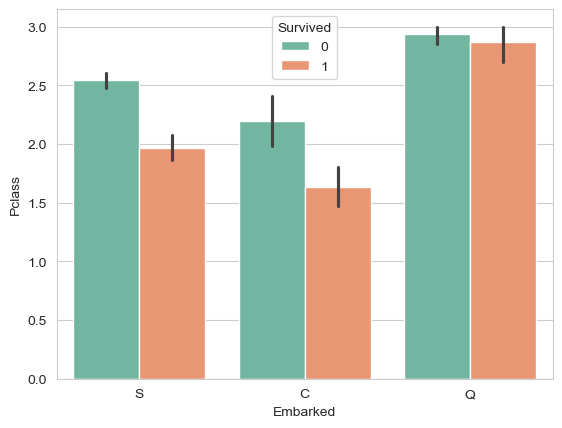

In [193]:
sns.barplot(x='Embarked',y='Pclass',hue="Survived",data=train_df,palette="Set2")
plt.show()

Plotting Age after converting into categories

In [194]:
train_df["Age"] = train_df["Age"].fillna(-0.5)
test_df["Age"] = test_df["Age"].fillna(-0.5)
bins = [0, 12, 17, 60, np.inf]
labels = ['child', 'teenager', 'adult', 'elderly']
age_groups = pd.cut(train_df.Age, bins, labels = labels)
train_df['AgeGroup'] = age_groups
test_df['AgeGroup'] = age_groups

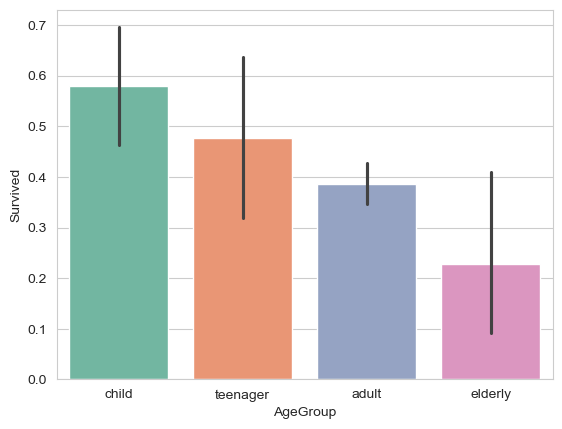

In [195]:
sns.barplot(x='AgeGroup',y='Survived',data=train_df,palette="Set2")
plt.show()

# Feature Engineering


### Extracting Titles from Names

In [196]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


In [197]:
def extract_title(df):
    df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    df['Title']=df['Title'].replace(['Lady','Mme','the Countess','Dona'],'Mrs')
    df['Title']=df['Title'].replace(['Col','Major','Capt'],'Military Officer')
    df['Title']=df['Title'].replace(['Mlle','Ms'],'Miss')
    df['Title']=df['Title'].replace(['Dr','Rev','Jonkheer','Sir','Don'],'Noble')





In [198]:
extract_title(train_df)
extract_title(test_df)

In [199]:
train_df['Title'].value_counts()

Title
Mr                  517
Miss                185
Mrs                 128
Master               40
Noble                16
Military Officer      5
Name: count, dtype: int64

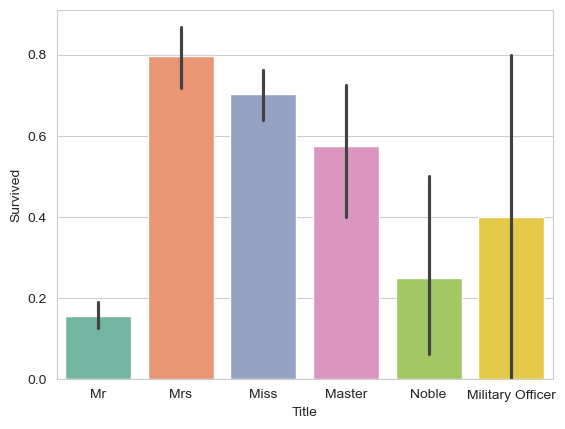

In [200]:
sns.barplot(x='Title',y='Survived',data=train_df,palette="Set2")
plt.show()

In [201]:
print("Survival Rates of Titles")
print("Mr")
print(round(train_df["Survived"][train_df["Title"]=="Mr"].value_counts(normalize=True)[1]*100,2))
print("Mrs")
print(round(train_df["Survived"][train_df["Title"]=="Mrs"].value_counts(normalize=True)[1]*100,2))
print("Miss")
print(round(train_df["Survived"][train_df["Title"]=="Miss"].value_counts(normalize=True)[1]*100,2))
print("Master")
print(round(train_df["Survived"][train_df["Title"]=="Master"].value_counts(normalize=True)[1]*100,2))
print("Noble")
print(round(train_df["Survived"][train_df["Title"]=="Noble"].value_counts(normalize=True)[1]*100,2))
print("Military Officer")
print(round(train_df["Survived"][train_df["Title"]=="Military Officer"].value_counts(normalize=True)[1]*100,2))

Survival Rates of Titles
Mr
15.67
Mrs
79.69
Miss
70.27
Master
57.5
Noble
25.0
Military Officer
40.0


In [202]:
def manipulate_family_members(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = 1
    df['IsAlone'].loc[df['FamilySize']>1]=0


In [203]:
manipulate_family_members(train_df)
manipulate_family_members(test_df)

In [204]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,Mr,1,1


In [205]:
def extract_deck(df):
    df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
    df['Deck']=df['Deck'].replace(['A','B','C'],'ABC')
    df['Deck']=df['Deck'].replace(['D','E'],'DE')
    df['Deck']=df['Deck'].replace(['F','G'],'FG')

In [206]:
extract_deck(train_df)
extract_deck(test_df)

In [207]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,FamilySize,IsAlone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult,Mr,2,0,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,Mrs,2,0,ABC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,Miss,1,1,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,Mrs,2,0,ABC
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,Mr,1,1,M


In [208]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,FamilySize,IsAlone,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,adult,Mr,1,1,M
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,adult,Mrs,2,0,M
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,adult,Mr,1,1,M
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,adult,Mr,1,1,M
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,adult,Mrs,3,0,M


In [209]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
AgeGroup        83
Title            0
FamilySize       0
IsAlone          0
Deck             0
dtype: int64

# Data Preprocessing

In [210]:
#Identifying Missing Values
df1=(train_df.isnull().sum()[train_df.isnull().sum()>0]).to_frame().rename(columns={'0':'No of Missing Values'})
df1['% of Missing Values']=round((100*train_df.isnull().sum()[train_df.isnull().sum()>0]/len(train_df)),2)
df1.sort_values(by='% of Missing Values', ascending=False, inplace=True)
df1

,0,% of Missing Values
Cabin,687,77.10
AgeGroup,177,19.87
Embarked,2,0.22


In [211]:
#Copying passenger id of test csv as we need it in future
pass_df=test_df[["PassengerId"]]

In [212]:
#Dropping Unncessary cols
def drop_columns(df):
    cols_to_drop=['PassengerId','Name','Ticket','Cabin']
    for col in cols_to_drop:
        df.drop(columns=[col],inplace=True)


In [213]:
drop_columns(train_df)
drop_columns(test_df)

In [214]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title,FamilySize,IsAlone,Deck
0,0,3,male,22.0,1,0,7.2500,S,adult,Mr,2,0,M
1,1,1,female,38.0,1,0,71.2833,C,adult,Mrs,2,0,ABC
2,1,3,female,26.0,0,0,7.9250,S,adult,Miss,1,1,M
3,1,1,female,35.0,1,0,53.1000,S,adult,Mrs,2,0,ABC
4,0,3,male,35.0,0,0,8.0500,S,adult,Mr,1,1,M


In [215]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Sex         891 non-null    object  
 3   Age         891 non-null    float64 
 4   SibSp       891 non-null    int64   
 5   Parch       891 non-null    int64   
 6   Fare        891 non-null    float64 
 7   Embarked    889 non-null    object  
 8   AgeGroup    714 non-null    category
 9   Title       891 non-null    object  
 10  FamilySize  891 non-null    int64   
 11  IsAlone     891 non-null    int64   
 12  Deck        891 non-null    object  
dtypes: category(1), float64(2), int64(6), object(4)
memory usage: 84.7+ KB


In [216]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      418 non-null    int64   
 1   Sex         418 non-null    object  
 2   Age         418 non-null    float64 
 3   SibSp       418 non-null    int64   
 4   Parch       418 non-null    int64   
 5   Fare        417 non-null    float64 
 6   Embarked    418 non-null    object  
 7   AgeGroup    335 non-null    category
 8   Title       418 non-null    object  
 9   FamilySize  418 non-null    int64   
 10  IsAlone     418 non-null    int64   
 11  Deck        418 non-null    object  
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 36.7+ KB


In [217]:
#Imputing Missing Values
cat_cols=train_df.select_dtypes(include=['object','category']).columns.tolist()
num_cols=train_df.select_dtypes(include=['int64','float64']).columns.tolist()

In [218]:
print(cat_cols)

['Sex', 'Embarked', 'AgeGroup', 'Title', 'Deck']


In [219]:
print(num_cols)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']


In [220]:
num_cols.remove('Survived')

### Imputing Missing Values

In [221]:
imputer1=SimpleImputer(strategy='most_frequent')
imputer2=SimpleImputer(strategy='median')
def fill_missing(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])


In [222]:
fill_missing(train_df)
fill_missing(test_df)

In [223]:
train_df.isnull().sum()[train_df.isnull().sum().sum()]

0

In [224]:
test_df.isnull().sum()[test_df.isnull().sum().sum()]

0

### Checking high Cardinality Values

In [225]:
print("Cardinality of features in numerical data is: ")
print(train_df.select_dtypes(include=["object"]).nunique())
print("\n","-"*50)
print("\nCardinality of features in categorical data is: ")
print(test_df.select_dtypes(include=["object"]).nunique())

Cardinality of features in numerical data is: 
Sex         2
Embarked    3
AgeGroup    4
Title       6
Deck        5
dtype: int64

 --------------------------------------------------

Cardinality of features in categorical data is: 
Sex         2
Embarked    3
AgeGroup    4
Title       6
Deck        4
dtype: int64


In [226]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    float64
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    float64
 5   Parch       891 non-null    float64
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   AgeGroup    891 non-null    object 
 9   Title       891 non-null    object 
 10  FamilySize  891 non-null    float64
 11  IsAlone     891 non-null    float64
 12  Deck        891 non-null    object 
dtypes: float64(7), int64(1), object(5)
memory usage: 90.6+ KB


### Encoding of variables to be used in Machine Learning Modelling

In [227]:
#Changing of Variables to correct datatype
def change_variable(df):
    df['IsAlone']=df['IsAlone'].astype('bool')
    df['FamilySize']=df['FamilySize'].astype('int')
    df['Parch']=df['Parch'].astype('int')
    df['SibSp']=df['SibSp'].astype('int')
    df['Pclass']=df['Pclass'].astype('int')


In [228]:
change_variable(train_df)
change_variable(test_df)

In [229]:
ordinal_cat_cols=['Deck']
nominal_cat_cols=['Sex','Embarked','AgeGroup','Title','IsAlone']

In [230]:
#Encoding Ordinal Columns
enc=LabelEncoder()
train_df[ordinal_cat_cols]=train_df[ordinal_cat_cols].apply(enc.fit_transform)
test_df[ordinal_cat_cols]=test_df[ordinal_cat_cols].apply(enc.fit_transform)


In [231]:
#Encoding Nominal Cols
train_df=pd.get_dummies(train_df,columns=nominal_cat_cols,dtype=int)
test_df=pd.get_dummies(test_df,columns=nominal_cat_cols,dtype=int)

### Now our training and test datasets are fit to be modelled by our machine learning algorithms

In [232]:
#Splitting Training and Test Dataset
X=train_df.drop(columns=["Survived"],axis=1)
y=train_df["Survived"]

In [233]:
#Feature Scaling for Non Tree Algorithms
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
test_df_scaled=scaler.fit_transform(test_df)


In [234]:
print(X_scaled)

[[ 0.82737724 -0.09592825  0.43279337 ... -0.13522468  1.2316449
  -1.2316449 ]
 [-1.56610693  0.80694372  0.43279337 ... -0.13522468  1.2316449
  -1.2316449 ]
 [ 0.82737724  0.12978974 -0.4745452  ... -0.13522468 -0.81192233
   0.81192233]
 ...
 [ 0.82737724 -1.36559194  0.43279337 ... -0.13522468  1.2316449
  -1.2316449 ]
 [-1.56610693  0.12978974 -0.4745452  ... -0.13522468 -0.81192233
   0.81192233]
 [ 0.82737724  0.46836673 -0.4745452  ... -0.13522468 -0.81192233
   0.81192233]]


In [235]:
#Splitting Data for algorithms which require scaling
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [236]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 24) (179, 24) (712,) (179,)


In [237]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2,random_state=42)

In [238]:
print(x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape)

(712, 24) (179, 24) (712,) (179,)


In [239]:
training_score=[]
testing_score=[]

### Building the Models for alogrithms which require scaled data
* Logistic Regression
* K Nearest Neighbours
* Support Vector Machines
* Naive Bayes

In [240]:
def model_prediction_scaled(model):
    model.fit(x_train,y_train)
    x_train_pred=model.predict(x_train)
    x_test_pred=model.predict(x_test)
    train_accuracy=accuracy_score(y_train,x_train_pred)
    test_accuracy=accuracy_score(y_test,x_test_pred)
    training_score.append(train_accuracy)
    testing_score.append(test_accuracy)
    print(f"Accuracy score of {model} training is ",train_accuracy)
    print(f"Accuracy score of {model} testing is ",test_accuracy)
    print("\n","-"*50)
    print(f"Precision score of {model} test data is ",precision_score(y_test,x_test_pred))
    print(f"Recall score of {model} test data is ",recall_score(y_test,x_test_pred))
    print(f"f1 score of {model} test data is ",f1_score(y_test,x_test_pred))
    print(f"Confusion Matrix of {model} is")
    cm=confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(12,10))
    sns.heatmap(cm,annot=True,fmt='g',cmap='summer')
    plt.show()






Accuracy score of LogisticRegression() training is  0.8356741573033708
Accuracy score of LogisticRegression() testing is  0.8212290502793296

 --------------------------------------------------
Precision score of LogisticRegression() test data is  0.7837837837837838
Recall score of LogisticRegression() test data is  0.7837837837837838
f1 score of LogisticRegression() test data is  0.7837837837837838
Confusion Matrix of LogisticRegression() is


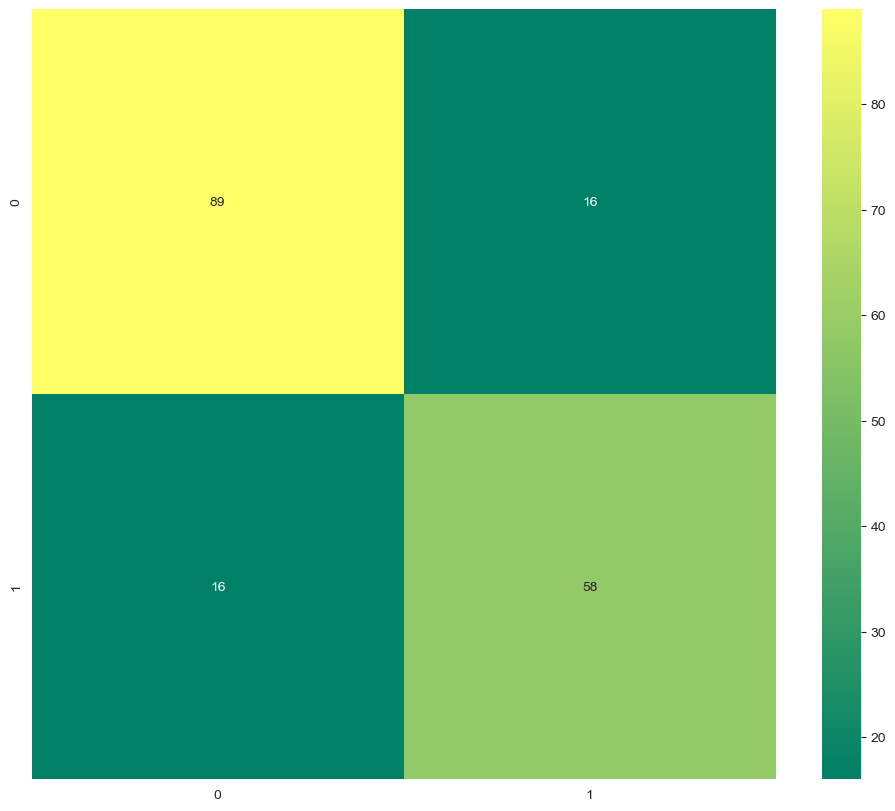

In [241]:
logreg=LogisticRegression()
model_prediction_scaled(logreg)

#### No Overfitting or underfitting for logistic regression

Accuracy score of KNeighborsClassifier() training is  0.8693820224719101
Accuracy score of KNeighborsClassifier() testing is  0.7988826815642458

 --------------------------------------------------
Precision score of KNeighborsClassifier() test data is  0.7794117647058824
Recall score of KNeighborsClassifier() test data is  0.7162162162162162
f1 score of KNeighborsClassifier() test data is  0.7464788732394366
Confusion Matrix of KNeighborsClassifier() is


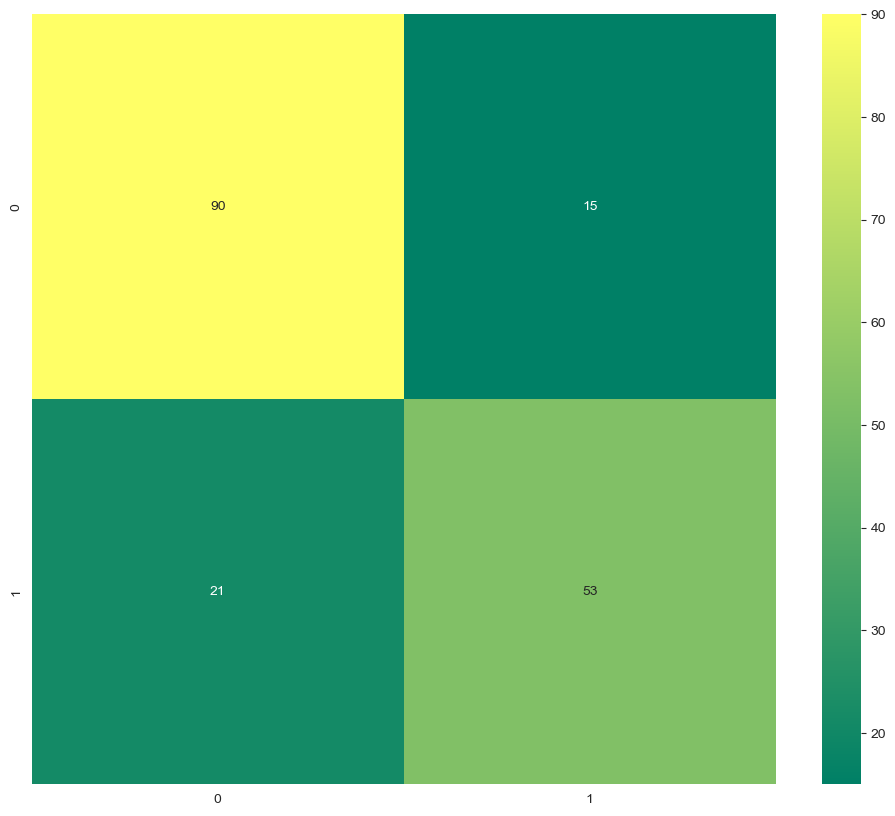

In [242]:
knn=KNeighborsClassifier()
model_prediction_scaled(knn)

#### Training score increased but simultaneously testing score decreased.

Accuracy score of SVC() training is  0.8497191011235955
Accuracy score of SVC() testing is  0.7988826815642458

 --------------------------------------------------
Precision score of SVC() test data is  0.7878787878787878
Recall score of SVC() test data is  0.7027027027027027
f1 score of SVC() test data is  0.7428571428571429
Confusion Matrix of SVC() is


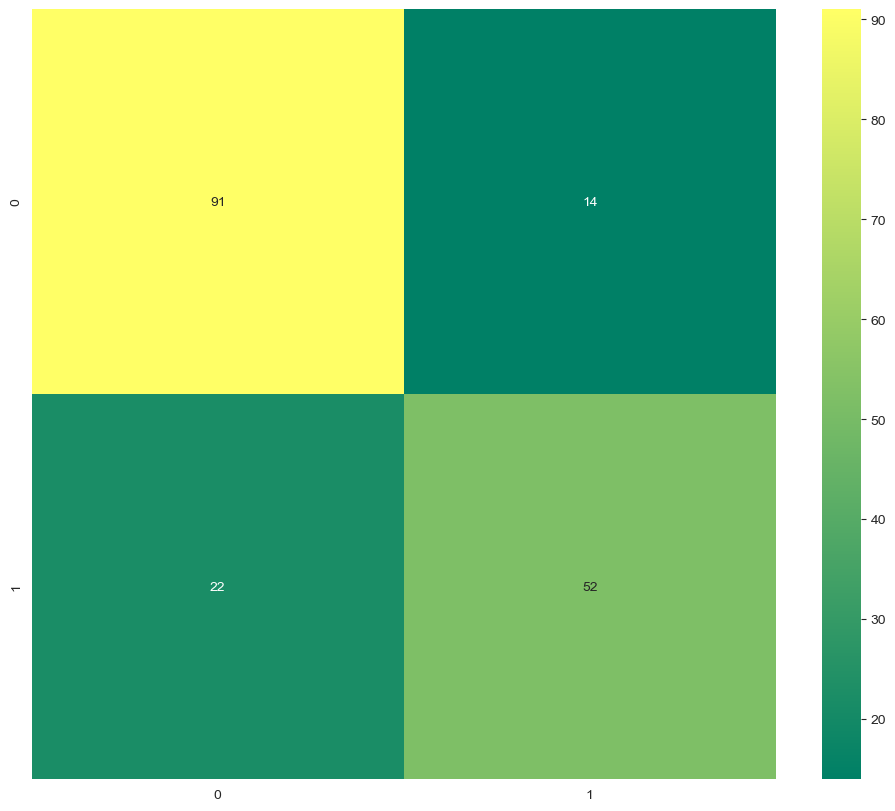

In [243]:
svc=SVC()
model_prediction_scaled(svc)

Accuracy score of GaussianNB() training is  0.8117977528089888
Accuracy score of GaussianNB() testing is  0.7821229050279329

 --------------------------------------------------
Precision score of GaussianNB() test data is  0.7215189873417721
Recall score of GaussianNB() test data is  0.7702702702702703
f1 score of GaussianNB() test data is  0.7450980392156863
Confusion Matrix of GaussianNB() is


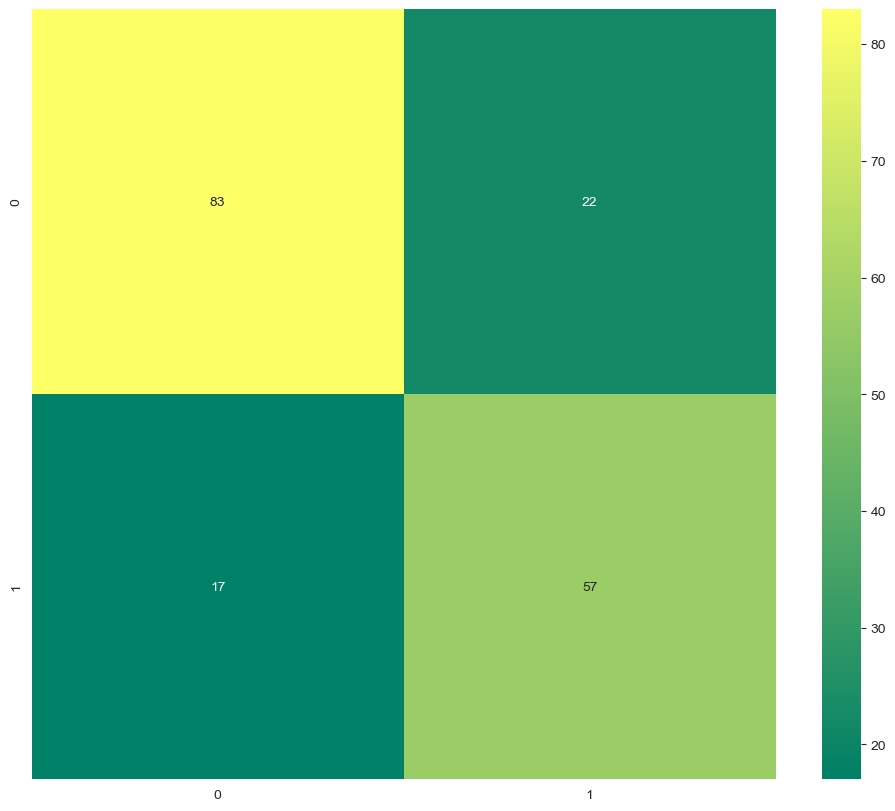

In [244]:
gaussian_nb=GaussianNB()
model_prediction_scaled(gaussian_nb)

#### This performed well on training and testing data

In [245]:

def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred=model.predict(x_train1)
    x_test_pred=model.predict(x_test1)
    train_accuracy1=accuracy_score(y_train1,x_train_pred)
    test_accuracy1=accuracy_score(y_test1,x_test_pred)
    training_score.append(train_accuracy1)
    testing_score.append(test_accuracy1)
    print(f"Accuracy score of {model} training is ",train_accuracy1)
    print(f"Accuracy score of {model} testing is ",test_accuracy1)
    print("\n","-"*50)
    print(f"Precision score of {model} test data is ",precision_score(y_test1,x_test_pred))
    print(f"Recall score of {model} test data is ",recall_score(y_test1,x_test_pred))
    print(f"f1 score of {model} test data is ",f1_score(y_test1,x_test_pred))
    print(f"Confusion Matrix of {model} is")
    cm=confusion_matrix(y_test1,x_test_pred)
    plt.figure(figsize=(12,10))
    sns.heatmap(cm,annot=True,fmt='g',cmap='summer')
    plt.show()

### Models which are robust to unscaled data
* LightGBM
* CatBoost
* XGBoost
* Decision Tree Classifier
* Random Forests

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 251
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

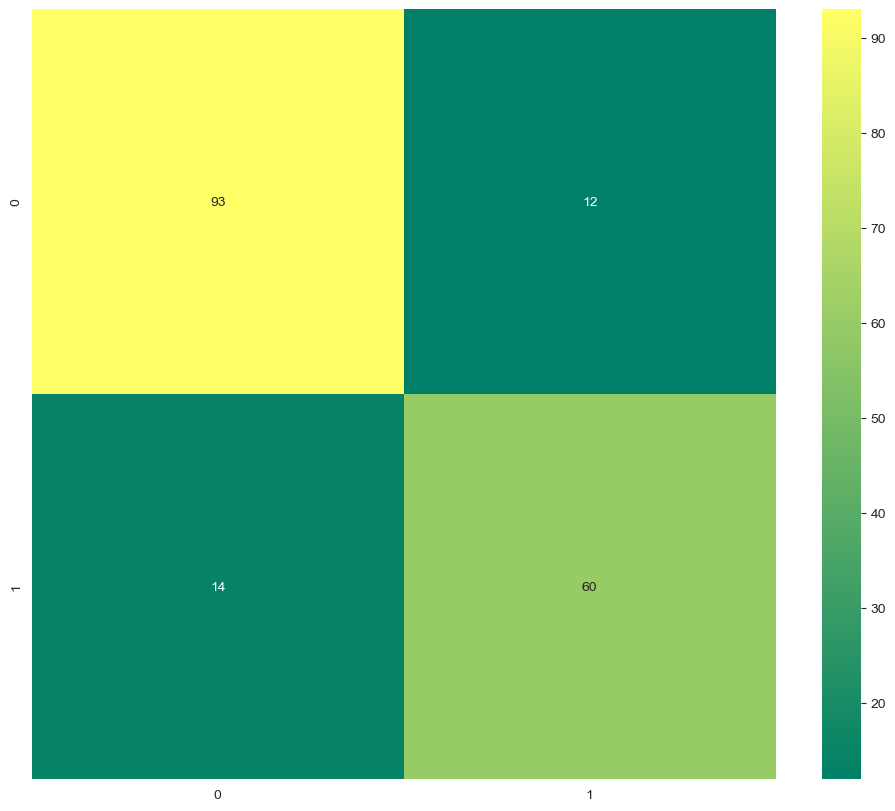

In [246]:
lightgbm=LGBMClassifier()
model_prediction_scaled(lightgbm)

Accuracy score of <catboost.core.CatBoostClassifier object at 0x0000021083DC6ED0> training is  0.9115168539325843
Accuracy score of <catboost.core.CatBoostClassifier object at 0x0000021083DC6ED0> testing is  0.8379888268156425

 --------------------------------------------------
Precision score of <catboost.core.CatBoostClassifier object at 0x0000021083DC6ED0> test data is  0.8169014084507042
Recall score of <catboost.core.CatBoostClassifier object at 0x0000021083DC6ED0> test data is  0.7837837837837838
f1 score of <catboost.core.CatBoostClassifier object at 0x0000021083DC6ED0> test data is  0.8
Confusion Matrix of <catboost.core.CatBoostClassifier object at 0x0000021083DC6ED0> is


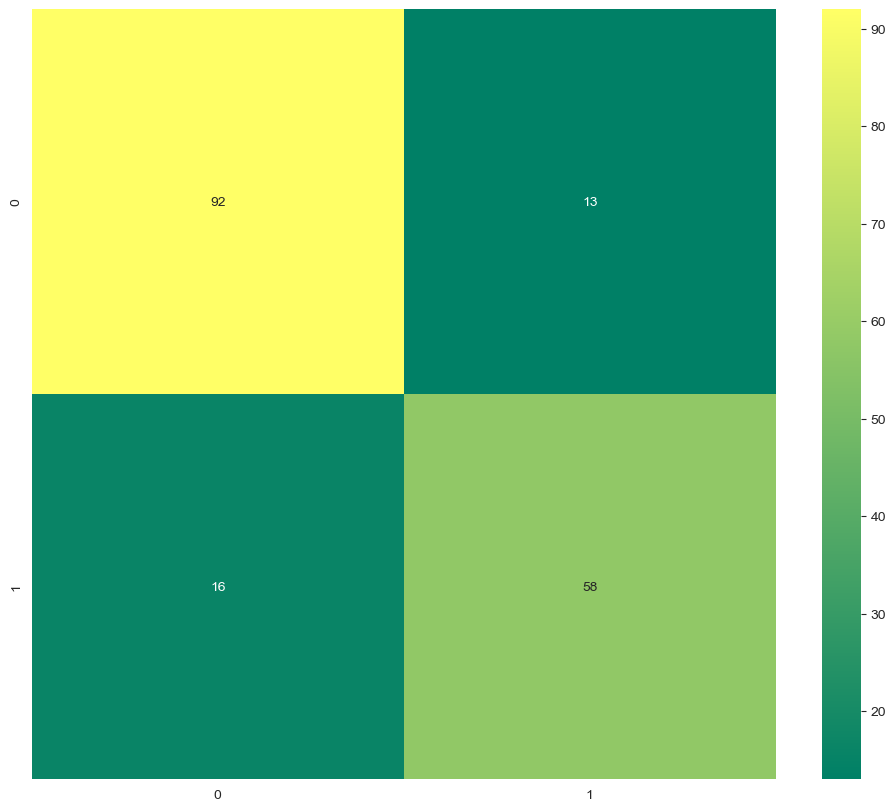

In [247]:
catboost=CatBoostClassifier(verbose=False)
model_prediction_scaled(catboost)

Accuracy score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) training is  0.9719101123595506
Accuracy score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None,

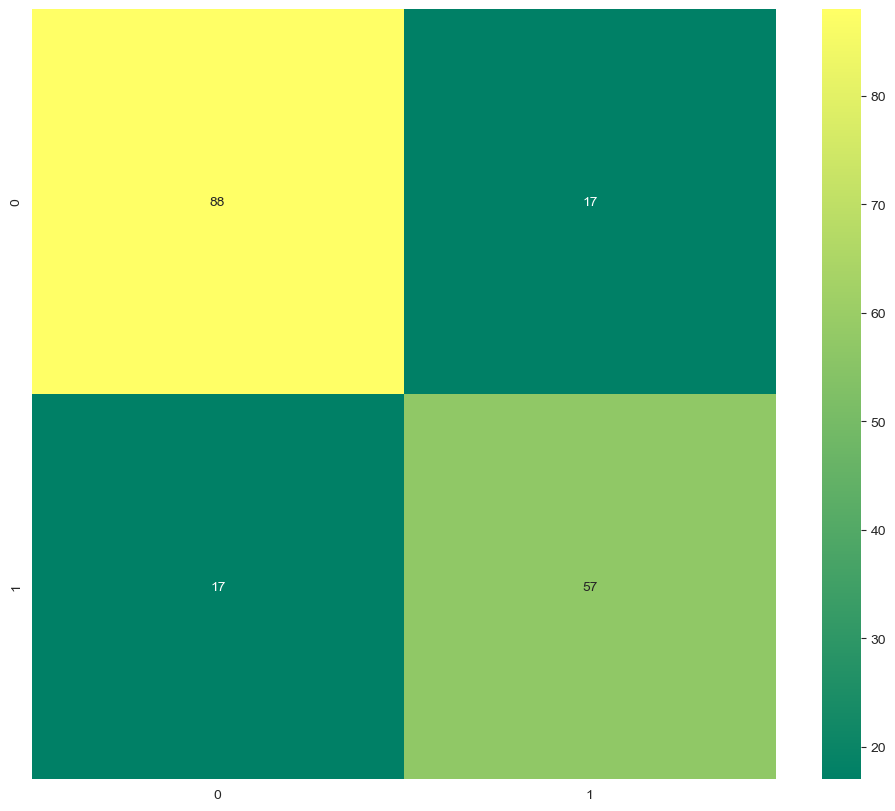

In [248]:
xgboost=XGBClassifier()
model_prediction(xgboost)

Accuracy score of RandomForestClassifier() training is  0.9859550561797753
Accuracy score of RandomForestClassifier() testing is  0.8268156424581006

 --------------------------------------------------
Precision score of RandomForestClassifier() test data is  0.8028169014084507
Recall score of RandomForestClassifier() test data is  0.7702702702702703
f1 score of RandomForestClassifier() test data is  0.7862068965517242
Confusion Matrix of RandomForestClassifier() is


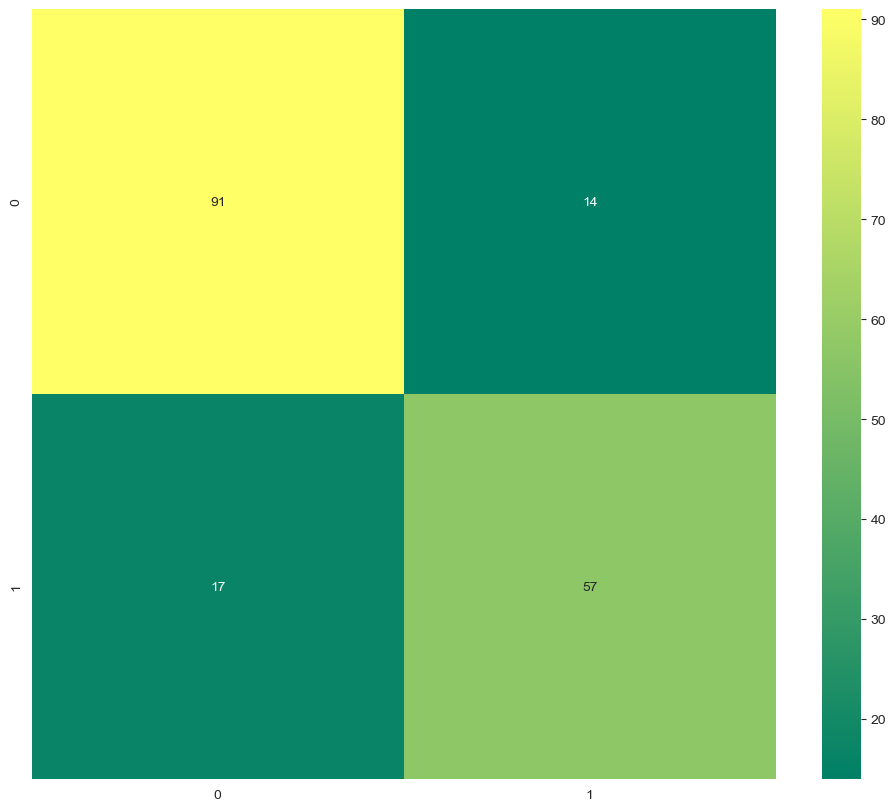

In [249]:
rf=RandomForestClassifier()
model_prediction(rf)

Accuracy score of DecisionTreeClassifier() training is  0.9859550561797753
Accuracy score of DecisionTreeClassifier() testing is  0.776536312849162

 --------------------------------------------------
Precision score of DecisionTreeClassifier() test data is  0.7575757575757576
Recall score of DecisionTreeClassifier() test data is  0.6756756756756757
f1 score of DecisionTreeClassifier() test data is  0.7142857142857143
Confusion Matrix of DecisionTreeClassifier() is


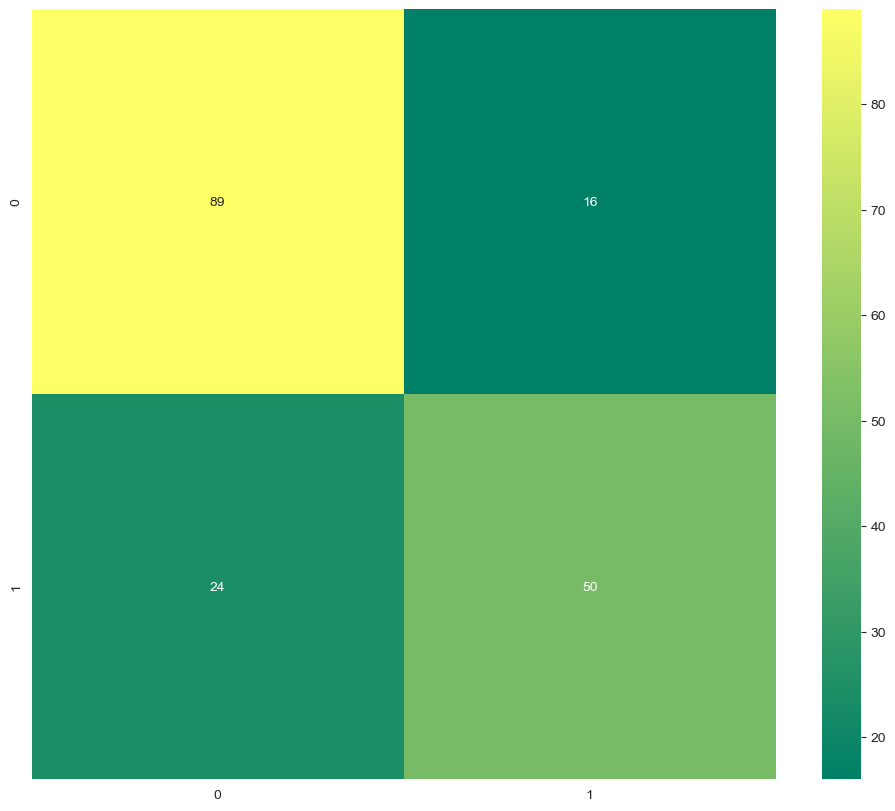

In [250]:
dt=DecisionTreeClassifier()
model_prediction(dt)

### Lets stack and plot all models performance data for training and testing and see which one performs better

In [251]:
models=["Logistic Regression","KNeighbours Classifier","Support Vector",
"Naive Bayes","LightGBM","CatBoost","XGBoost",
"Decision Tree Classifier","Random Forests"]
df=pd.DataFrame({"Model":models,"Training Score":training_score,"Testing Score":testing_score})


In [252]:
df.sort_values(by='Testing Score',ascending=False)

,Model,Training Score,Testing Score
4,LightGBM,0.960674,0.854749
5,CatBoost,0.911517,0.837989
7,Decision Tree Classifier,0.985955,0.826816
0,Logistic Regression,0.835674,0.821229
6,XGBoost,0.971910,0.810056
1,KNeighbours Classifier,0.869382,0.798883
2,Support Vector,0.849719,0.798883
3,Naive Bayes,0.811798,0.782123
8,Random Forests,0.985955,0.776536


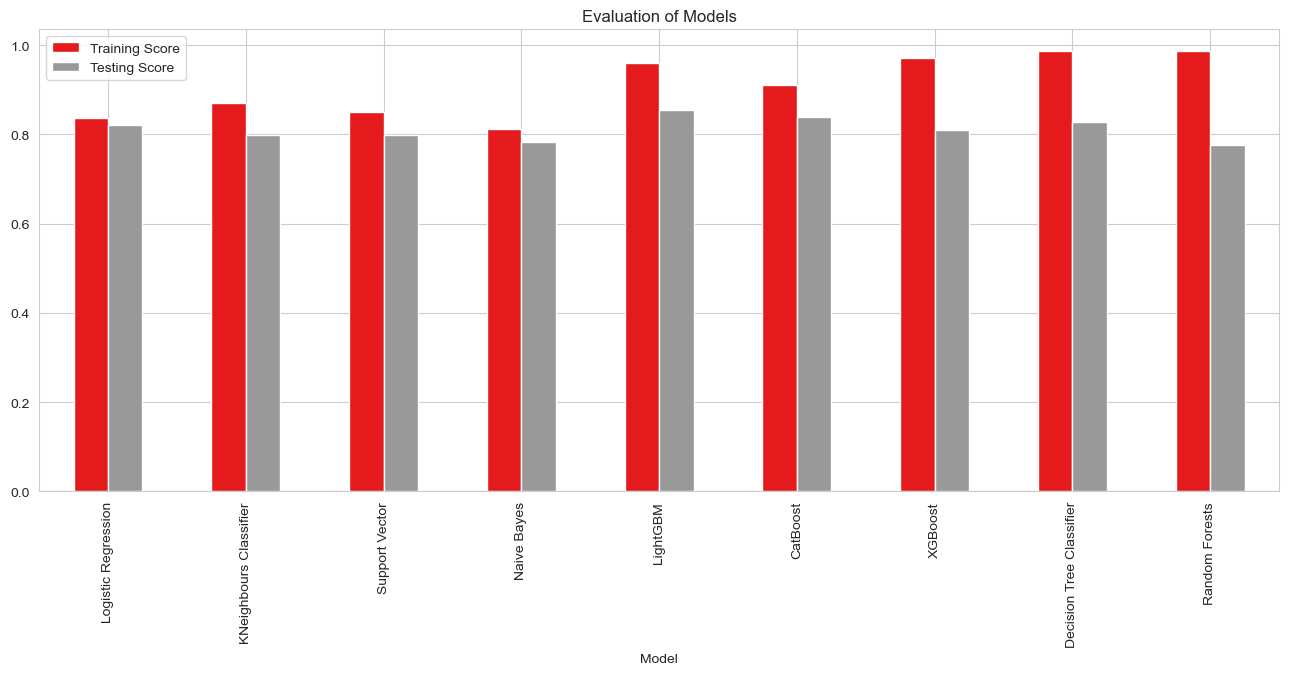

In [253]:
df.plot(x="Model",y=["Training Score","Testing Score"],colormap="Set1",kind='bar',title="Evaluation of Models",figsize=(16,6))
plt.show()

### We have selected following top 3 models based on their performance and we will use hyperparameters to tune these models

### Hyperparameter Tuning


In [254]:
model1=LGBMClassifier()
parameters1={'n_estimators':[100,200,300,400,500],
             'learning_rate':[0,0.01,0.02,0.03],
             'random_state':[0,42,48,50],
             'num_leaves':range(1,21,1),}

In [255]:
cv1=GridSearchCV(model1,parameters1,cv=5,n_jobs=-1)
cv1.fit(x_train1,y_train1.values.ravel())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0, 0.01, 0.02, 0.03],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'num_leaves': range(1, 21),
                         'random_state': [0, 42, 48, 50]})

In [256]:
cv1.best_score_

0.8370333891460652

In [257]:
best_params1=cv1.best_params_

In [258]:
model_final_LGBM=LGBMClassifier(**best_params1)
model_final_LGBM.fit(x_train1,y_train1)
pred_1=model_final_LGBM.predict(x_train1)
accuracy1=accuracy_score(y_train1,pred_1)
print(accuracy1)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
0.8328651685393258


In [264]:
model2=CatBoostClassifier(verbose=False)
parameters2={"learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7],
             "random_state":range(0,3),
             "depth":[8,9,10],
             "iterations":[35,40,50]}
cv2=GridSearchCV(model2,parameters2,cv=5,n_jobs=-1)
cv2.fit(x_train1,y_train1)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000021083E025D0>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [35, 40, 50],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
                         'random_state': range(0, 3)})

In [266]:
cv2.best_score_

0.8328474342558849

In [269]:
best_params2=cv2.best_params_

In [272]:
model_final_CatBoost=CatBoostClassifier(**best_params2)
model_final_CatBoost.fit(x_train1,y_train1,verbose=False)
pred_2=model_final_CatBoost.predict(x_test1)
accuracy2=accuracy_score(y_test1,pred_2)
print(accuracy2)

0.8324022346368715


In [273]:
model3=DecisionTreeClassifier()
parameters3={'criterion':['gini','entropy'],
             'max_depth':[2,5,10],
             'min_samples_leaf':[1,2,4]
             }
cv3=GridSearchCV(model3,parameters3,cv=5,n_jobs=-1)
cv3.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10],
                         'min_samples_leaf': [1, 2, 4]})

In [274]:
cv3.best_score_

0.8174037230375258

In [275]:
best_params3=cv3.best_params_

In [276]:
model_final_DecisionTree=DecisionTreeClassifier(**best_params3)
model_final_DecisionTree.fit(x_train1,y_train1)
pred_3=model_final_DecisionTree.predict(x_test1)
accuracy3=accuracy_score(y_test1,pred_3)
print(accuracy3)

0.8212290502793296


In [279]:
stacking_model=StackingClassifier(estimators=[('LGBM',model_final_LGBM),('Catboost',model_final_CatBoost),('Decision Tree',model_final_DecisionTree)])
stacking_model.fit(x_train1,y_train1)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
0:	learn: 0.5688859	total: 6.75ms	remaining: 331ms
1:	learn: 0.4977413	total: 21.2ms	remaining: 510ms
2:	learn: 0.4524310	total: 23.3ms	remaining: 365ms
3:	learn: 0.4193670	total: 26.3ms	remaining: 302ms
4:	learn: 0.4037354	total: 28.3ms	remaining: 255ms
5:	learn: 0.3767626	total: 40.1ms	remaining: 294ms
6:	learn: 0.3590733	total: 50.5ms	remaining: 310ms
7:	learn: 0.

StackingClassifier(estimators=[('LGBM',
                                LGBMClassifier(learning_rate=0.03,
                                               n_estimators=400, num_leaves=2,
                                               random_state=0)),
                               ('Catboost',
                                <catboost.core.CatBoostClassifier object at 0x0000021083E02F30>),
                               ('Decision Tree',
                                DecisionTreeClassifier(max_depth=5,
                                                       min_samples_leaf=4))])

In [281]:
x_train_pred4=stacking_model.predict(x_train1)
x_test_pred4=stacking_model.predict(x_test1)
print("Stacking Model Training Accuracy",accuracy_score(y_train,x_train_pred4)*100)
print("Stacking Model Testing Accuracy",accuracy_score(y_test,x_test_pred4)*100)

Stacking Model Training Accuracy 90.58988764044943
Stacking Model Testing Accuracy 82.68156424581005


In [283]:
final_pred=stacking_model.predict(test_df)

In [284]:
print(final_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [285]:
pass_df['Survived']=final_pred

In [286]:
pass_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [288]:
pass_df.to_csv("Titanic_Predictions.csv",index=False)